In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
import numpy as np

import os 
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime

In [2]:
from supporting_function import*

In [3]:
df = pd.read_csv("azd.csv")

In [4]:
#Filtering the data. 
df=df[['priceDate','arrivals','minPrice','maxPrice','modalPrice']] 

In [5]:
df["mis_m1_minprice"]    = df["minPrice"]
df["mis_m1_maxprice"]    = df["maxPrice"]
df["mis_m1_modalprice"]  = df["modalPrice"]
####
df["mis_m2_minprice"]    = df["minPrice"]
df["mis_m2_maxprice"]    = df["maxPrice"]
df["mis_m2_modalprice"]  = df["modalPrice"]
####

In [6]:
df = df.drop_duplicates()

In [7]:
#Writing Descriptive analysis. 
file_path ="csv_output/descriptive_analysis.csv"
if os.path.exists(file_path):
    print("File already written!!!.....")
else:
    df.describe().to_csv(file_path)

File already written!!!.....


In [8]:
# Missing Value Treatment
#Method 1 : Using mean to substitute missing values. 
col_name = "mis_m1_minprice"
df = replace_mis_val_mean(df,col_name)

col_name = "mis_m1_maxprice"
df = replace_mis_val_mean(df,col_name)


col_name = "mis_m1_modalprice"
df = replace_mis_val_mean(df,col_name)




In [9]:
# Missing Value Treatment
#Method 2 : Using Linear Regression for filling missing values 
col_name = "mis_m2_minprice"
df = mis_replace_linear_regression(df,X_col= ["maxPrice","modalPrice"],Y_col=col_name)

col_name = "mis_m2_maxprice"
df = mis_replace_linear_regression(df,X_col=["minPrice"] ,Y_col=col_name)


col_name = "mis_m2_modalprice"
df = mis_replace_linear_regression(df,X_col=["minPrice"] ,Y_col=col_name)


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [10]:
# Outlier handling
col_name ="mis_m2_minprice"
df = handle_outlier(df,col_name,df[col_name].mean())

col_name = "mis_m2_maxprice"
df = handle_outlier(df,col_name,df[col_name].mean())

col_name = "mis_m2_modalprice"
df = handle_outlier(df,col_name,df[col_name].mean())

In [11]:
# df.head()

In [12]:
df_new = df.copy()

In [13]:
df_ts =df_new[["priceDate","mis_m2_minprice","mis_m2_maxprice","mis_m2_modalprice"]]

In [14]:
#df_ts.head()

In [15]:
df_ts.columns = ["timestamp","min_price","max_price","modal_price"]

In [16]:
df_ts["timestamp"]= pd.to_datetime(df_ts["timestamp"])

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Saving Figure!!!!


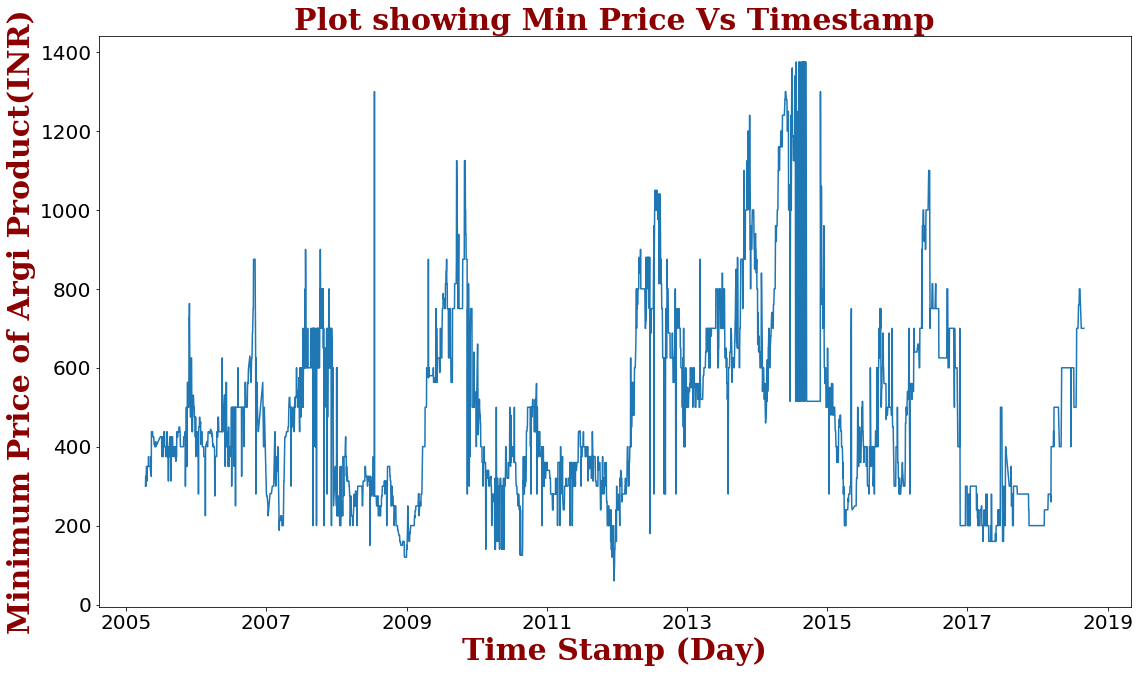

Saving Figure!!!!


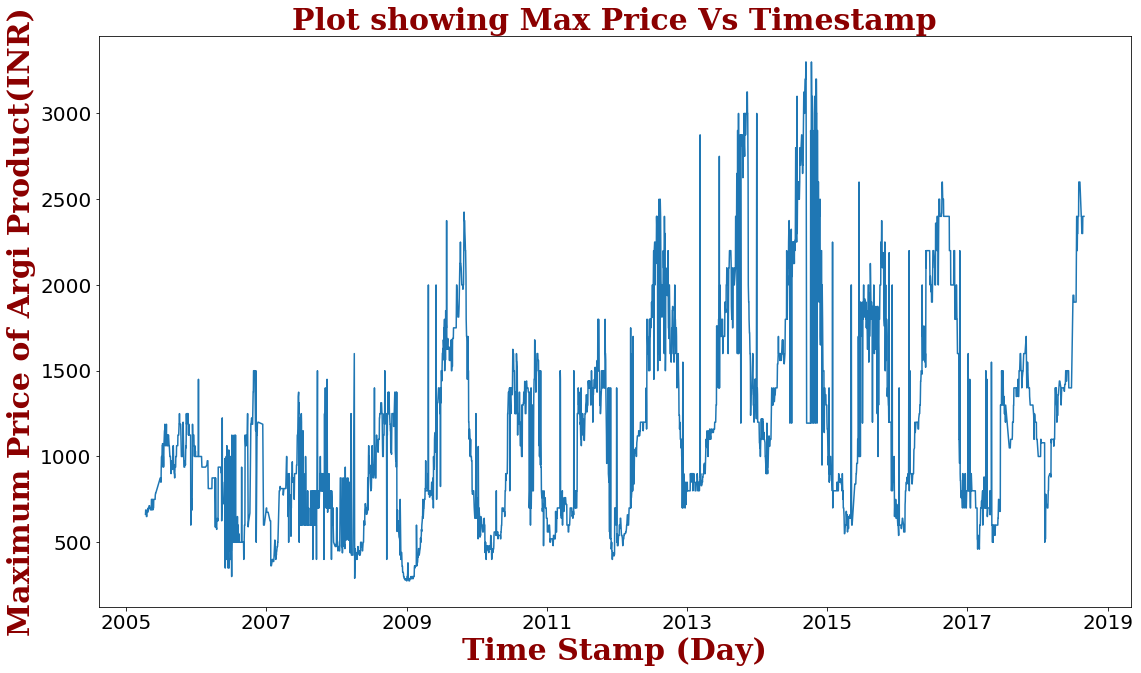

Saving Figure!!!!


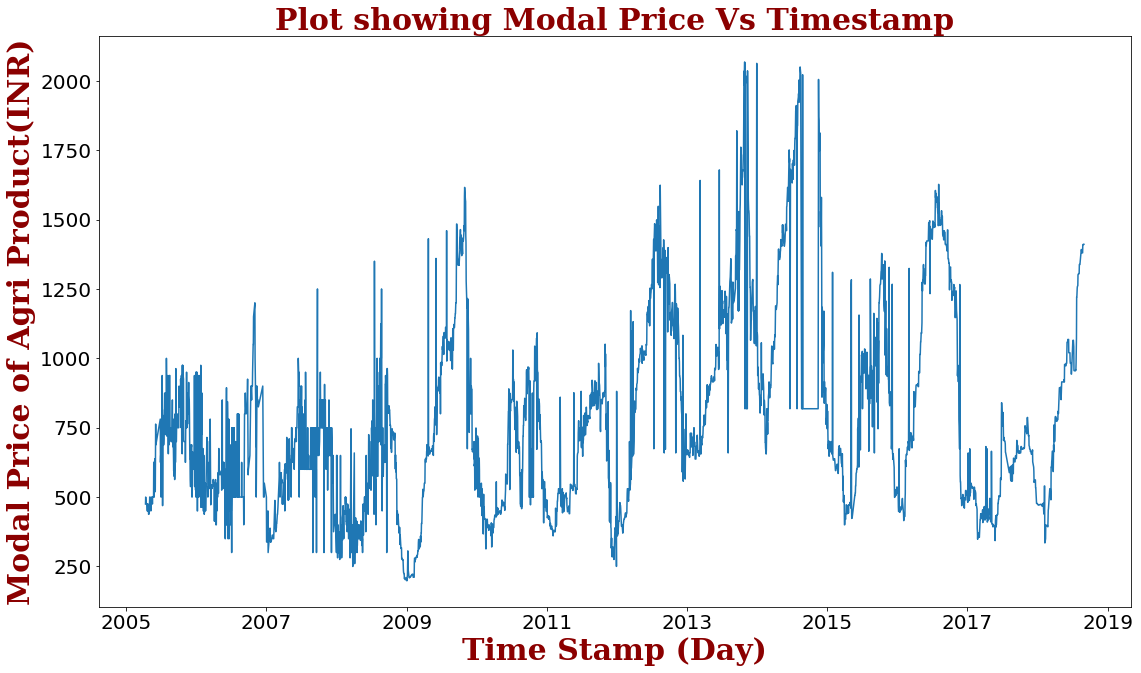

In [17]:
####
df_plot_series = df_ts.copy()
time_col = "Time Stamp (Day)"
min_col  = "Minimum Price of Argi Product(INR)"
max_col  = "Maximum Price of Argi Product(INR)"
mod_col  = "Modal Price of Agri Product(INR)"
df_plot_series.columns = [time_col,min_col,max_col,mod_col]
#######


title = "Plot showing Min Price Vs Timestamp"
file_path = "plots/Actual_minprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=min_col,title=title,hard_save=True)


title = "Plot showing Max Price Vs Timestamp"
file_path = "plots/Actual_maxprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=max_col,title=title,hard_save=True)

title = "Plot showing Modal Price Vs Timestamp"
file_path = "plots/Actual_modprice_all.png"
plot_time_series_data(df_plot_series,file_path,time_col=time_col,data_col=mod_col,title=title,hard_save=True)







In [18]:
file_path_fun_mva=lambda x,y: "plots/"+x+'_moving_averages_'+ convert_list_to_str(y) +".png"

In [19]:
file_path_fun_mva('min',[30,50,100])

'plots/min_moving_averages_30_50_100.png'

Saving Figure!!!!


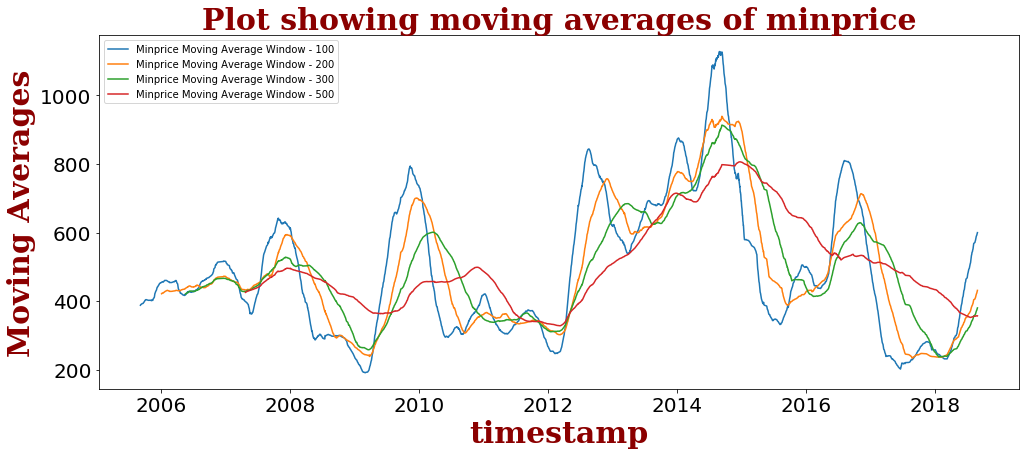

Saving Figure!!!!


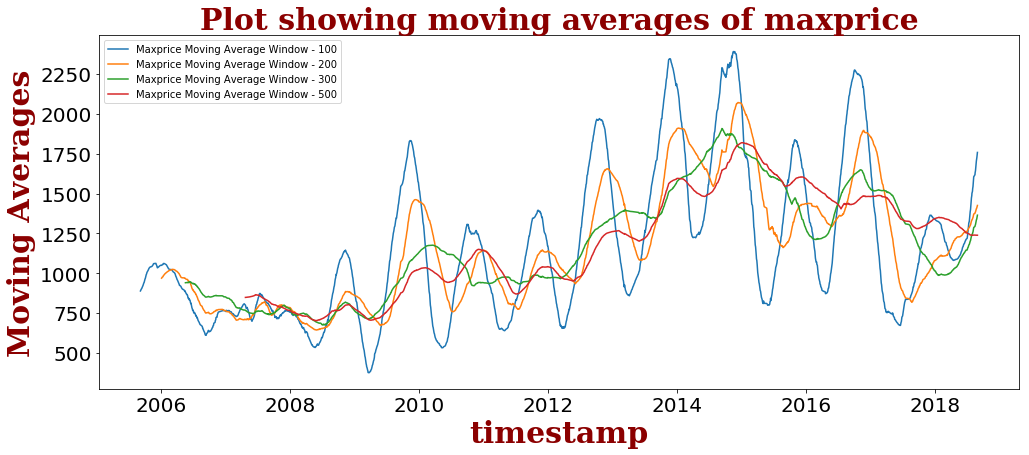

Saving Figure!!!!


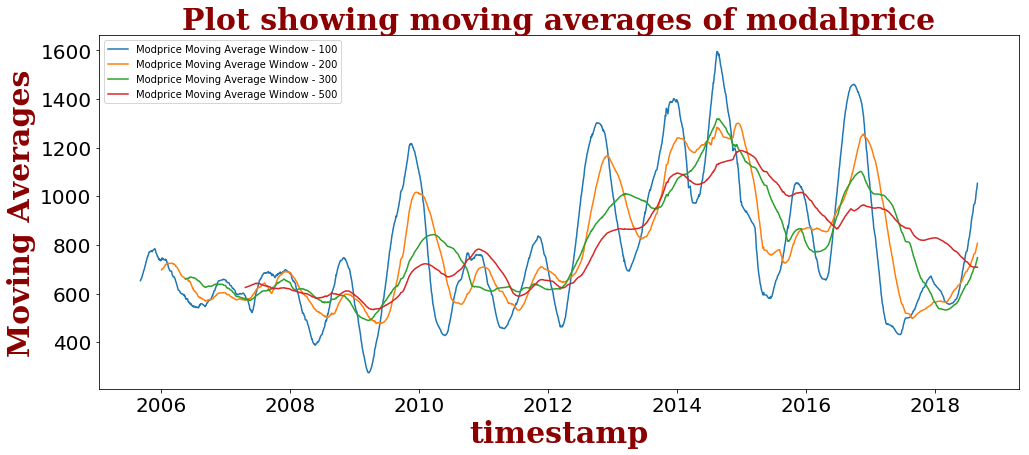

In [20]:
###################  

df_ts_m= df_ts.copy()

col_name_min = "min_price"
col_name_prefix_min = "Minprice"
##
col_name_max = "max_price"
col_name_prefix_max = "Maxprice"
##
col_name_mod = "modal_price"
col_name_prefix_mod = "Modprice"
##
window_size_list = [100,200,300,500]
data_col_list    = []
##

    
#file_path_fun_mva=lambda x,y: " plots/"+x+'_moving_averages_'+ _convert_list_to_str(window_size_list) +".png"

col_function = lambda x,y : x +"_"+"m_avg_"+str(y)
col_function_bus = lambda x,y : x +" "+"Moving Average Window - "+str(y)

generate_col = col_function_bus


df_ts_m,data_col_list_min=find_moving_averages(df_ts_m,col_name_min,col_name_prefix_min,window_size_list,generate_col)
df_ts_m,data_col_list_max=find_moving_averages(df_ts_m,col_name_max,col_name_prefix_max,window_size_list,generate_col)
df_ts_m,data_col_list_mod=find_moving_averages(df_ts_m,col_name_mod,col_name_prefix_mod,window_size_list,generate_col)

#############################  PLOT FOR MOVING AVERAGE

title = "Plot showing moving averages of minprice"

x_col  = "timestamp"
plotting_multiple_series(df_ts_m,file_path_fun_mva('min',window_size_list),data_col_list_min,x_col,title=title,hard_save=True)


title = "Plot showing moving averages of maxprice"
file_path = "plots/max_moving_averages.png"
plotting_multiple_series(df_ts_m,file_path_fun_mva('max',window_size_list),data_col_list_max,x_col,title=title,hard_save=True)

title = "Plot showing moving averages of modalprice"
file_path = "plots/modal_moving_averages.png"
plotting_multiple_series(df_ts_m,file_path_fun_mva('mod',window_size_list),data_col_list_mod,x_col,title=title,hard_save=True)

## Importing Libraries essential For forecasting

In [21]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from math import sqrt
from collections import defaultdict

## This below section is for validating Holt Winter Method of Forecating
####  Step 1 : First Make the data in to two (one for training, and other for validation)
####  Step 2 : Fix the Frequency of the Timeseries

defaultdict(<function <lambda> at 0x121ebe7b8>, {'method2': {'max_price': 486.92891021275386, 'min_price': 134.9309182555552, 'modal_price': 355.2272307524848}})
Saving Figure!!!!


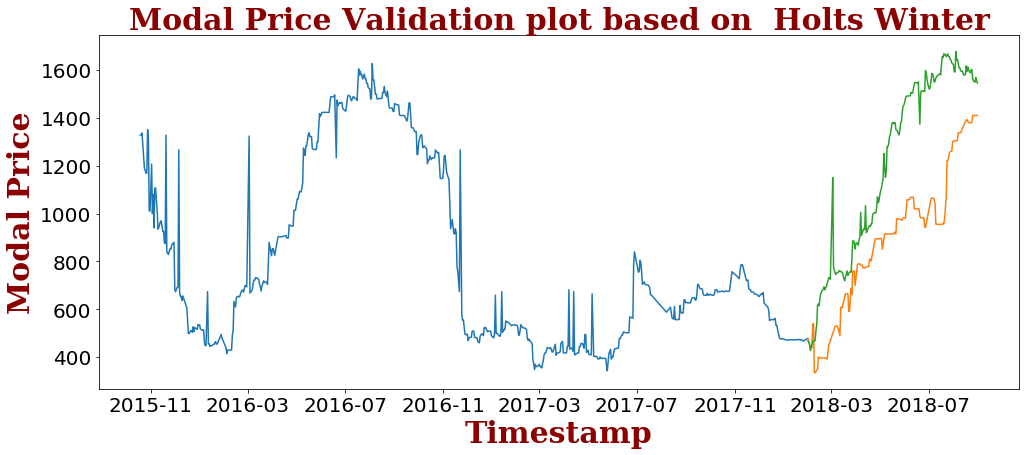

In [131]:
######Forecasting Starts Here Partition Train and test data.  
train_df = df_ts[3000:3600] #:3200
test_df  = df_ts[3600:]

train_df.index = train_df["timestamp"]
train_df = train_df.resample('D').mean()
test_df.index  = test_df["timestamp"]
test_df = test_df.resample('D').mean()
performance_statistics = defaultdict(lambda : {})

###################

train_df = train_df.interpolate(limit_direction='both')
test_df  = test_df.interpolate(limit_direction='both')

###################

forecast_col_name = "modal_price"
col_name_prefix    = "Modal"
######

timestamp_col_name = "timestamp"
train_df_col = train_df[forecast_col_name]
test_df_col  = test_df[forecast_col_name]
pd_train_df_col = pd.DataFrame(train_df_col)
pd_test_df_col  = pd.DataFrame(test_df_col)


####  Holts Winter Forecast Validation. 
method_suffix = " Holts Winter"
new_forecast_col = "forecast_val_method2"
if(forecast_col_name=="min_price"):
    trend_str = "mul"
    seasonal_str = "mul"
elif forecast_col_name=="max_price":
    trend_str = "mul"
    seasonal_str = "add"
elif forecast_col_name=="modal_price":
    trend_str ="add"
    seasonal_str = "add"
######################################################################
fit2 = ExponentialSmoothing((np.asarray(pd_train_df_col[forecast_col_name])) ,seasonal_periods=365 ,trend=trend_str, seasonal=seasonal_str).fit()

pd_test_df_col[new_forecast_col]= fit2.forecast(len(test_df_col))
performance_statistics["method2"][forecast_col_name]= sqrt((pd_test_df_col[forecast_col_name]-pd_test_df_col[new_forecast_col]).apply(lambda x : x**2).mean().mean())

############ Plotting the graph
data_dict = {"df_train": pd_train_df_col,
             "df_test" : pd_test_df_col,
             "a_col_name_train": forecast_col_name ,
             "a_col_name_test": forecast_col_name ,
             "f_col_name": new_forecast_col,
             "time_col" : "Timestamp" , 
             "y_data_col" : col_name_prefix+" Price",
             "title" : col_name_prefix +" Price Validation plot based on "+method_suffix ,
             "file_path" : "plots/"+ col_name_prefix+"_plot_"+ method_suffix.replace(" ","_") +".png",
             "plot_show" : True,
             "hard_save" : True}

print(performance_statistics)
plot_forecasted_validation(data_dict)


## The below section is for getting the forecast for next 30 days

In [148]:
# This is performing actual forecast for writing to file 
######Forecasting Starts Here Partition Train and test data.  
train_df = df_ts[3000:] #:3200
train_df.index = train_df["timestamp"]
train_df = train_df.resample('D').mean()

performance_statistics = defaultdict(lambda : {})

###################
train_df = train_df.interpolate(limit_direction='both')
list_col_names = ["min_price","max_price","modal_price"]
result_dict    = {}

for forecast_col_name in list_col_names:
    
    method_suffix = " Holts Winter"
    ###################
    #poorna fix this (change accordingly)
    if forecast_col_name=="min_price":
        col_name_prefix = "Min"
    elif forecast_col_name=="max_price":
        col_name_prefix = "Max"
    elif forecast_col_name=="modal_price":
        col_name_prefix ="Modal"
    ###################################
    
    
    
    timestamp_col_name = "timestamp"
    train_df_col = train_df[forecast_col_name]
    pd_train_df_col = pd.DataFrame(train_df_col)

    
    ####################################populating timestamps for forecast 
    test_start_date    = "2018-09-01"
    n_forecast_points  = 30
    test_end_date      = (datetime.datetime.strptime(test_start_date,"%Y-%m-%d") + datetime.timedelta(days=30)).strftime("%Y-%m-%d")

    cur_date = test_start_date
    forecast_time_list = []
    while cur_date!=test_end_date:
        forecast_time_list+=[cur_date]
        cur_date_dt = datetime.datetime.strptime(cur_date,"%Y-%m-%d") + datetime.timedelta(days=1)
        cur_date = cur_date_dt.strftime("%Y-%m-%d")

    ###############################################
        
        
        
    ####  Holts Winter Forecast Validation. 
    #This is for setting the holts winter parameters
    if(forecast_col_name=="min_price"):
        trend_str = "mul"
        seasonal_str = "mul"
    elif forecast_col_name=="max_price":
        trend_str = "mul"
        seasonal_str = "add"
    elif forecast_col_name=="modal_price":
        trend_str ="add"
        seasonal_str = "add"

    fit2 = ExponentialSmoothing((np.asarray(pd_train_df_col[forecast_col_name])) ,seasonal_periods=365 ,trend=trend_str, seasonal=seasonal_str).fit()

    forecasted_values = fit2.forecast(len(forecast_time_list))
    
    result_dict["Timestamp"] = forecast_time_list
    result_dict["Forecast_"+col_name_prefix+"_Price"] = forecasted_values





/usr/local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:182: RuntimeWarning: overflow encountered in double_scalars
  (alphac * (l[i - 1] * b[i - 1]**phi))
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:185: RuntimeWarning: overflow encountered in double_scalars
  b[i - 1]**phi)) + (gammac * s[i - 1])
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:183: RuntimeWarning: invalid value encountered in double_scalars
  b[i] = (beta * (l[i] / l[i - 1])) + (betac * b[i - 1]**phi)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:186: RuntimeWarning: overflow encountered in multiply
  return sqeuclidean((l * b**phi) * s[:-(m - 1)], y)
/usr/local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  b[i - 1]**phi)) + (gammac * s[i - 1])
/usr/local/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encounter

In [147]:
#Writing the forecast 
final_output = pd.DataFrame(result_dict)
final_output.to_csv("Forecasted_output.csv")

## This is for seasonal Decomposition

In [ ]:

# ##Seasonal decompositon. If you want to write about it. 
# import statsmodels.api as sm

# sm.tsa.seasonal_decompose(train_df_col).plot()
# result = sm.tsa.stattools.adfuller(train_df_col)
# fig = plt.gcf()
# fig.set_size_inches(16.5, 6.5)
# plt.show()




## This is showing forecast based on Simple Exponential 

In [ ]:
# ## Forecast Method 1
# method_suffix = "SimpleExp Smoothing"
# new_forecast_col = "forecast_val_method1"
# fit1 =SimpleExpSmoothing(np.asarray(pd_train_df_col[forecast_col_name])).fit(smoothing_level=0.6,optimized=False)
# pd_test_df_col["forecast_val_method1"]= fit1.forecast(len(test_df_col))
# performance_statistics["method1"][forecast_col_name]= sqrt((pd_test_df_col[forecast_col_name]-pd_test_df_col["forecast_val_method1"]).apply(lambda x : x**2).mean().mean())

# ############ Plotting the graph
# data_dict = {"df_train": pd_train_df_col,
#              "df_test" : pd_test_df_col,
#              "a_col_name_train": forecast_col_name ,
#              "a_col_name_test": forecast_col_name ,
#              "f_col_name": new_forecast_col,
#              "time_col" : "Timestamp" , 
#              "y_data_col" : col_name_prefix+" Price",
#              "title" : col_name_prefix +" Price Validation plot based on "+method_suffix ,
#              "file_path" : "plots/"+ col_name_prefix+"_plot_"+ method_suffix.replace(" ","_") +".png",
#              "plot_show" : True,
#              "hard_save" : True}



# plot_forecasted_validation(data_dict)


## This is for ARIMA Model

In [ ]:
#This is ARIMA Method. 

# fit3 =sm.tsa.statespace.SARIMAX(pd_train_df_col[forecast_col_name], order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
# pd_test_df_col["forecast_val_method3"]= fit3.predict(start = "2018-01-31", end="2018-08-31",dynamic = True)
# performance_statistics["method3"][forecast_col_name]= sqrt((pd_test_df_col[forecast_col_name]-pd_test_df_col["forecast_val_method3"]).apply(lambda x : x**2).mean().mean())

# ############ Plotting the graph
# data_dict = {"df_train": pd_train_df_col,
#              "df_test" : pd_test_df_col,
#              "a_col_name_train": forecast_col_name ,
#              "a_col_name_test": forecast_col_name ,
#              "f_col_name": "forecast_val_method3",
#              "time_col" : "Timestamp" , 
#              "y_data_col" : "Max Price",
#              "title" : "Min Price Validation plot based on SimpleExp Smoothing" ,
#              "file_path" : "plots/min_plot_exp_smooth.png",
#              "plot_show" : True,
#              "hard_save" : True}


# plot_forecasted_validation(data_dict)

